Weights found: [23.44591837 -6.48738174]


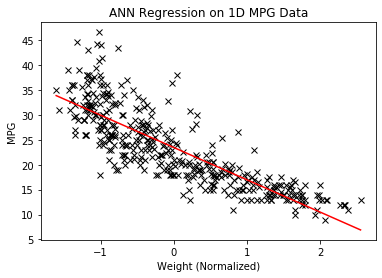

In [5]:
import numpy as np
import matplotlib.pyplot as plt

X_file = np.genfromtxt('mpg.csv', delimiter=',', skip_header=1)
N = np.shape(X_file)[0]
X = np.hstack((np.ones(N).reshape(N, 1), X_file[:, 4].reshape(N, 1)))
Y = X_file[:, 0]

# Standardize the input 
X[:, 1] = (X[:, 1]-np.mean(X[:, 1]))/np.std(X[:, 1])

# There are two weights, the bias weight and the feature weight
w = np.array([0, 0])

# Start batch gradient descent, it will run for max_iter epochs and have a step
# size eta
max_iter = 100
eta = 1E-3
for t in range(0, max_iter):
    # We need to iterate over each data point for one epoch
    grad_t = np.array([0., 0.])
    for i in range(0, N):
        x_i = X[i, :]
        y_i = Y[i]
        # Dot product, computes h(x_i, w)
        h = np.dot(w, x_i)-y_i
        grad_t += 2*x_i*h

    # Update the weights
    w = w - eta*grad_t
print ("Weights found:",w)

# Plot the data and best fit line
tt = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 10)
bf_line = w[0]+w[1]*tt

plt.plot(X[:, 1], Y, 'kx', tt, bf_line, 'r-')
plt.xlabel('Weight (Normalized)')
plt.ylabel('MPG')
plt.title('ANN Regression on 1D MPG Data')

plt.savefig('mpg.png')

plt.show()